### Standard Scaler

In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000),
})

<Axes: ylabel='Density'>

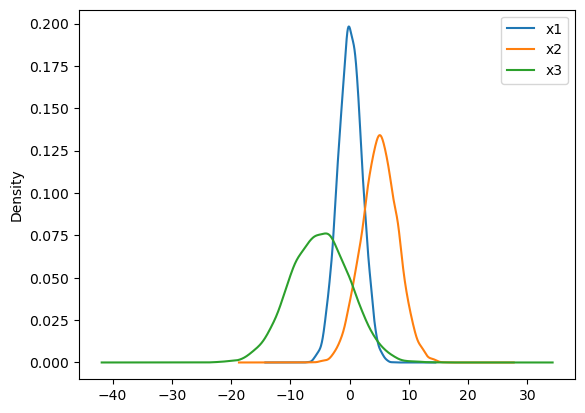

In [3]:
df.plot(kind='kde')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


<AxesSubplot:ylabel='Density'>

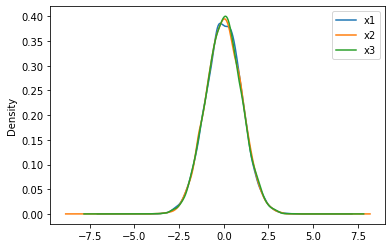

In [8]:
scaled_df.plot(kind='kde')

In [11]:
df.aggregate(['mean', 'std'])

x1        x2        x3
mean  0.020263  4.999752 -4.925986
std   2.010982  3.004183  4.977511

In [12]:
scaled_df.aggregate(['mean', 'std'])

x1            x2            x3
mean  6.394885e-18 -1.321609e-16 -3.623768e-17
std   1.000050e+00  1.000050e+00  1.000050e+00

### Min-Max Scaler

In [14]:
df = pd.DataFrame({
    'x1': np.random.chisquare(8, 1000),
    'x2': np.random.beta(8,2,1000) * 40,
    'x3': np.random.normal(10,3,1000)
})

<AxesSubplot:ylabel='Density'>

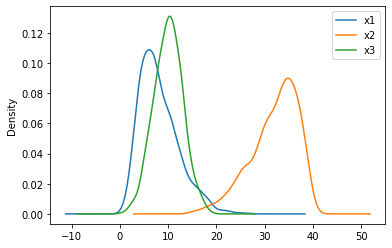

In [15]:
df.plot(kind='kde')

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)

<AxesSubplot:ylabel='Density'>

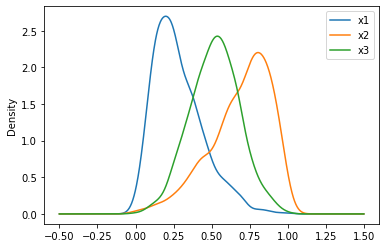

In [17]:
scaled_df.plot(kind='kde')

In [22]:
df.aggregate(['min', 'max', 'mean', 'std'])

x1         x2         x3
min    1.154893  15.116139   0.383167
max   25.949421  39.614379  18.897976
mean   8.143955  32.012805  10.013793
std    4.047415   4.879878   3.002951

In [23]:
scaled_df.aggregate(['min', 'max', 'mean', 'std'])

x1            x2            x3
min  -1.727660e+00 -3.464251e+00 -3.208658e+00
max   4.401421e+00  1.558518e+00  2.959965e+00
mean  5.062617e-17  1.705303e-16  3.552714e-17
std   1.000500e+00  1.000500e+00  1.000500e+00

#### Standardisation on skewed data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)

<AxesSubplot:ylabel='Density'>

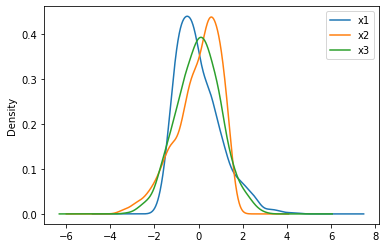

In [21]:
scaled_df.plot(kind='kde')

In [24]:
scaled_df.aggregate(['min', 'max', 'mean', 'std'])

x1            x2            x3
min  -1.727660e+00 -3.464251e+00 -3.208658e+00
max   4.401421e+00  1.558518e+00  2.959965e+00
mean  5.062617e-17  1.705303e-16  3.552714e-17
std   1.000500e+00  1.000500e+00  1.000500e+00

### Robust Scaling

In [29]:
df = pd.DataFrame({
    'x1': np.concatenate((np.random.normal(20,1,1000), np.random.normal(4,1,25))),
    'x2': np.concatenate((np.random.normal(30,1,1000), np.random.normal(50,1,25)))
})

<AxesSubplot:ylabel='Density'>

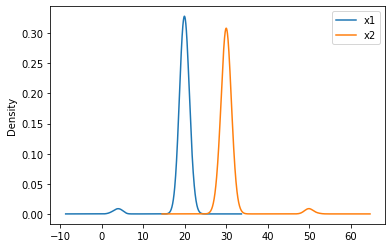

In [31]:
df.plot(kind='kde')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)

<AxesSubplot:ylabel='Density'>

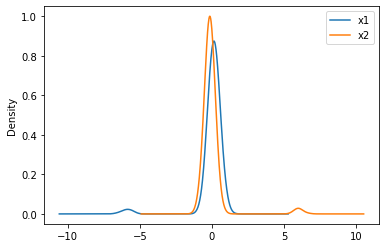

In [33]:
scaled_df.plot(kind='kde')

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)

<AxesSubplot:ylabel='Density'>

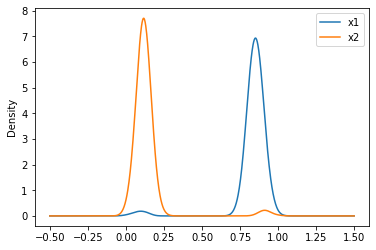

In [35]:
scaled_df.plot(kind='kde')

In [36]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_arr = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_arr, columns=df.columns)

<AxesSubplot:ylabel='Density'>

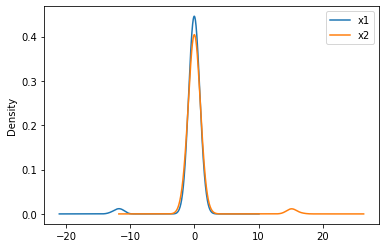

In [37]:
scaled_df.plot(kind='kde')

### Encoding

In [1]:
import pandas as pd

In [14]:
titanic = pd.read_csv('titanic.csv')

In [15]:
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

titanic['sex_encoded'] = encoder.fit_transform(titanic.Sex)

In [17]:
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  sex_encoded  
0        0         A/5 21171   7.2500   NaN        S            1  
1        0          PC 17599  71.2833   C85        C            0  
2        0  STON/O2. 3101282   7.9250   NaN        S            0  
3        0            113803  53.1000  C123        S            0  
4        0            373450   8.0500   NaN        S            1  
..     ...               ...      ...   ...      ...          ...  
886      0            211536  13.0000   NaN        S            1  
887      0            112053  30.0000   B42        S            0  
888      2        W./C. 6607  23.4500   NaN        S            0  
889      0            111369  30.0000  C148        C            1  
890      0            370376   7.7500   NaN        Q            1  

[891 rows x 13 columns]

In [18]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
pd.get_dummies(titanic, columns=['Embarked'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin  sex_encoded  Embarked_C  \
0        0         A/5 21171   7.2500   NaN            1           0   
1        0          PC 17599  71.2833   C85            0           1   
2        0  STON/O2. 3101282   7.9250   NaN            0           0   
3        0            113803  53.1000  C123            0           0   
4        0            373450   8.0500   NaN            1           0   
..     ...               ...      ...   ...          ...         ...   
886      0            211536  13.0000   NaN            1           0   
887      0            112053  30.0000   B42            0           0   
888      2        W./C. 6607  23.4500   NaN            0           0   
889      0            111369  30.0000  C148            1           1   
890      0            370376   7.7500   NaN            1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 15 columns]

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder()

encoder_ohe.fit_transform(titanic[['Embarked']]).toarray()

NameError: name 'titanic' is not defined

### Transformers

In [12]:
from sklearn.impute._base import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
titanic_df = pd.read_csv('titanic.csv')

In [5]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Parch', 'SibSp']

In [8]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [9]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
from sklearn import set_config
set_config(display='diagram')

In [21]:
age_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

fair_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [23]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [39]:
transformer1 = ColumnTransformer(transformers=[
    ('Continous_Data_Processing', numeric_transformer, numerical_features),
    ('Categorical_Data_Processing', categorical_transformer, categorical_features)
])

In [40]:
transformer1

ColumnTransformer(transformers=[('Continous_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('Categorical_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass', 'Parch',
                                  'SibSp'])])

In [44]:
transformer1.fit_transform(titanic_df).toarray().shape

(891, 24)

In [24]:
transformer = ColumnTransformer(transformers=[
    ('Age_Data_Processing', age_transformer, ['Age']),
    ('Fair_Data_Processing', fair_transformer, ['Fare']),
    ('Categorical_Data_Processing', categorical_transformer, categorical_features)
])

In [25]:
transformer

ColumnTransformer(transformers=[('Age_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age']),
                                ('Fair_Data_Processing',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Fare']),
                                ('Categorical_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass', 'Parch',
                                  'SibSp'])])

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic_df, test_size=0.3)

In [27]:
train.shape, test.shape

((623, 12), (268, 12))

In [28]:
transformer.fit_transform(train).toarray().shape

(623, 24)

In [29]:
transformer.transform(test).toarray().shape

(268, 24)

In [30]:
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [89]:
Title_Dictionary = {
    "Capt": "Officer", "Col": "Officer", "Major": "Officer","Jonkheer": "Royalty",
    "Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty",
    "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs", "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss",
    "Master" : "Master", "Lady" : "Royalty"}

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

In [107]:
class NameTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('Initializing NameTransformer class')
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        Title_Dictionary = {
            "Capt": "Officer", "Col": "Officer", "Major": "Officer","Jonkheer": "Royalty",
            "Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty",
            "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs", "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss",
            "Master" : "Master", "Lady" : "Royalty"}
        x['Title'] = x['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
        x['Title'] = x.Title.map(Title_Dictionary)
        
        x_ = x.drop('Name',axis=1)
        
        return x_

In [108]:
ob_name_Trans = NameTransformer()

Initializing NameTransformer class


In [111]:
ob_name_Trans.fit_transform(titanic_df)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked    Title  
0           A/5 21171   7.2500   NaN        S       Mr  
1            PC 17599  71.2833   C85        C      Mrs  
2    STON/O2. 3101282   7.9250   NaN        S     Miss  
3              113803  53.1000  C123        S      Mrs  
4              373450   8.0500   NaN        S       Mr  
..                ...      ...   ...      ...      ...  
886            211536  13.0000   NaN        S  Officer  
887            112053  30.0000   B42        S     Miss  
888        W./C. 6607  23.4500   NaN        S     Miss  
889            111369  30.0000  C148        C       Mr  
890            370376   7.7500   NaN        Q       Mr  

[891 rows x 12 columns]

In [118]:
age_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

fair_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

name_transformer = Pipeline(steps=[
    ('extract_title', NameTransformer()),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
    
])

Initializing NameTransformer class


In [119]:
transformer = ColumnTransformer(transformers=[
    ('Age_Data_Processing', age_transformer, ['Age']),
    ('Fair_Data_Processing', fair_transformer, ['Fare']),
    ('Categorical_Data_Processing', categorical_transformer, categorical_features),
    ('NameTransformer', name_transformer, ['Name'])
])

In [120]:
transformer

ColumnTransformer(transformers=[('Age_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age']),
                                ('Fair_Data_Processing',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Fare']),
                                ('Categorical_Data_Processing',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass', 'Parch',
                                  'SibSp']),
                                ('NameTransformer',
                                 Pipeline(steps=[('extract_title',
                                                  NameTransformer()),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Name'])])

In [121]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic_df, test_size=0.3)

In [124]:
transformer.fit_transform(train).toarray()

Initializing NameTransformer class


array([[ 0.72172382,  0.96594244,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.40383601,  0.02473091,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.40986063, -0.46135345,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.11004666, -0.36382119,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04287263, -0.41120559,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.73100943, -0.31185566,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [125]:
transformer.transform(test).toarray()

array([[-0.11933227, -0.31643679,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18650631,  0.83579455,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11933227, -0.46332843,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.11933227, -0.46364496,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79818347, -0.31643679,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49234489, -0.36619041,  0.        , ...,  0.        ,
         0.        ,  0.        ]])